In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [7]:
cond = df['Species'].isin(['Bream', 'Smelt'])
lw_df = df.loc[cond, ['Length2', 'Weight']]
fish_data = lw_df.values.tolist()

In [9]:
fish_target = [1] * 35 + [0] * 14 # 지금은 숫자로 간소화...

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
kn = KNeighborsClassifier() # 인스턴스화

In [14]:
train_input = fish_data[:35] # 학습할 때 쓰는 인풋 데이터
train_target = fish_target[:35] # 학습할 때 쓰는 정답 데이터

test_input = fish_data[35:] # 테스트할 때 쓰는 인풋 데이터
test_target = fish_target[35:] # 테스트할 때 쓰는 정답 데이터

In [15]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [16]:
kn.score(test_input, test_target)

0.0

In [17]:
# 샘플링 편향 -> 훈련 세트와 테스트 세트가 전혀 다름
# 훈련 세트에 빙어와 도미 데이터를 적절히 넣어줘야 함

In [18]:
import numpy as np

In [20]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
# 리스트 형태를 numpy array 2차원 배열 형식으로 바꿈
# 인덱스 섞기 위해서

In [22]:
np.random.seed(42)
index = np.arange(49) # 49개 데이터 만들기
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [23]:
# 학습용 데이터와 테스트용 데이터를 따로 나눠서 사용해보기

In [25]:
input_arr[[1, 3]] # fancy indexing 내가 원하는 인덱스의 리스트 데이터로 추출

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [37]:
# 원본 데이터를 섞어서 일부분 사용하는 것이 목표

# 훈련용 데이터
train_input = input_arr[index[:35]] # 섞인 상태
train_target = target_arr[index[:35]]

# 채점용 데이터
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [38]:
# 잘 섞였는지 눈으로 확인해보기

In [39]:
import matplotlib.pyplot as plt

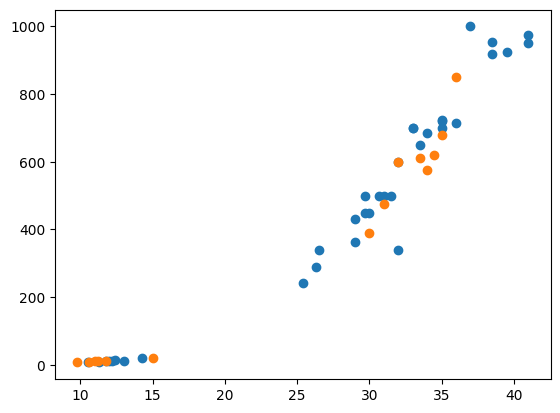

In [40]:
# 산점도
plt.scatter(train_input[:, 0], train_input[:, 1]) # 길이, 무게
plt.scatter(test_input[:, 0], test_input[:, 1])

In [41]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [42]:
kn.score(test_input, test_target)

1.0

In [43]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### iris 데이터로 연습

In [129]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [130]:
# Setosa, Versicolor인지 구분하기
# iris 데이터프레임 -> petal_length, petal_width	기준으로 분류

In [131]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [132]:
iris['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [133]:
iris['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [134]:
cond = iris['species'].isin(['setosa', 'versicolor'])
iris_df = iris.loc[cond, ['petal_length', 'petal_width']]
iris_data = iris_df.values.tolist()

In [135]:
iris_target = [1] * 50 + [0] * 50 # 지금은 숫자로 간소화...

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
kn = KNeighborsClassifier() # 인스턴스화

In [138]:
import numpy as np

In [139]:
input_arr = np.array(iris_data)
target_arr = np.array(iris_target)
# 리스트 형태를 numpy array 2차원 배열 형식으로 바꿈
# 인덱스 섞기 위해서

In [144]:
np.random.seed(100)
index = np.arange(100) # 49개 데이터 만들기
np.random.shuffle(index)
print(index)

[37 62 26 41 35 25 36 33 77 21 85 50 92 69 96 78 72  5 40 11 29 83 82 43
 28 22 23 90 86 20 32  6  3 12 51 84 73 64 54 68 75 74 57 42 76 99 17 93
 63  0 18 44 38 45 39 70 94 30 71 46 56 80 91 88 19 81 55 89 61 65 47 49
  7 97 59 95 13  1 31  4 27  2  9 16 58 60 15 98 34 14 66 53 52 10 48 79
 87 67 24  8]


In [146]:
# 원본 데이터를 섞어서 일부분 사용하는 것이 목표

# 훈련용 데이터
train_input = input_arr[index[:50]] # 섞인 상태
train_target = target_arr[index[:50]]

# 채점용 데이터
test_input = input_arr[index[50:]]
test_target = target_arr[index[50:]]

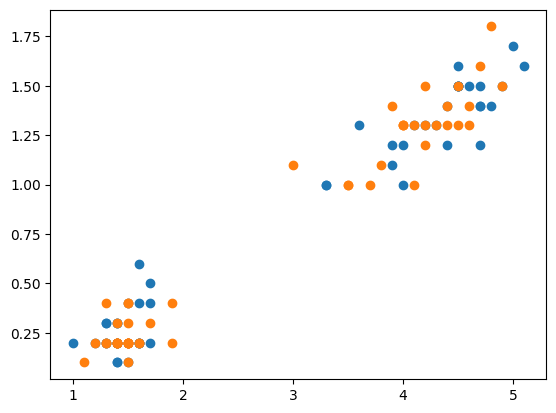

In [147]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1]) # 길이, 무게
plt.scatter(test_input[:, 0], test_input[:, 1])

In [148]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [149]:
kn.predict(test_input)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1])

### 연습문제 답변

In [174]:
cond = iris['species'].isin(['setosa', 'versicolor'])
iris_df = iris.loc[cond, ['petal_length', 'petal_width']]

iris_data = iris_df.values

In [175]:
setosa_count = iris.loc[iris['species'] == 'setosa'].shape[0]
versicolor_count = iris.loc[iris['species'] == 'versicolor'].shape[0]

In [181]:
import numpy as np
iris_target = np.array([1] * setosa_count + [0] * versicolor_count)

In [182]:
# numpy 아닌 방식으로 인덱스 섞기

import random

index = list(range(setosa_count + versicolor_count))
random.shuffle(index)

In [183]:
train_input = iris_data[index[:70]]
train_target = iris_target[index[:70]] # 보통은 80:20으로 학습된 데이터가 더 많게 만듦

In [184]:
test_input = iris_data[index[70:]]
test_target = iris_target[index[70:]]

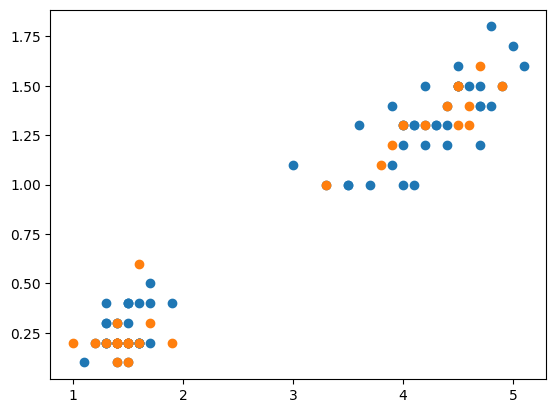

In [185]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
kn = KNeighborsClassifier()

In [188]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [189]:
kn.score(test_input, test_target)

1.0